In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import library to remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('listingss.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69346,9671724,"Cozy room in Greenwich, river view",49977905,Kurt,NaN,Greenwich,51.48300,-0.01346,Private room,55,5,67,2021-10-03,0.84,3,0,1,NaN
69347,20277958,River view Tate Modern,1132775,Mark,NaN,Southwark,51.50914,-0.10192,Entire home/apt,201,3,61,2022-09-09,0.99,1,0,12,NaN
69348,20512703,"Luxury 4 bed house, 100m to river and palace",1706966,Asher & Aileen,NaN,Richmond upon Thames,51.40571,-0.35325,Entire home/apt,246,3,6,2022-08-31,1.49,1,4,6,NaN
69349,49698549,Waterfront Hampton Stay,34213667,Alan,NaN,Richmond upon Thames,51.41029,-0.35975,Entire home/apt,250,3,9,2022-07-18,0.61,1,2,4,NaN


In [3]:
print(f'duplicated data: {df.duplicated().sum()}')
print(f'missing values: {df.isnull().sum().sum()}')

duplicated data: 0
missing values: 172288


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69351 non-null  int64  
 1   name                            69330 non-null  object 
 2   host_id                         69351 non-null  int64  
 3   host_name                       69346 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   69351 non-null  object 
 6   latitude                        69351 non-null  float64
 7   longitude                       69351 non-null  float64
 8   room_type                       69351 non-null  object 
 9   price                           69351 non-null  int64  
 10  minimum_nights                  69351 non-null  int64  
 11  number_of_reviews               69351 non-null  int64  
 12  last_review                     

# EDA

In [5]:
df1 = df

In [6]:
# descriptive analysis of numerical data
df1.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.935100e+04,6.935100e+04,0.0,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,52571.000000,69351.000000,69351.000000,69351.000000,0.0
mean,1.373703e+17,1.242124e+08,NaN,51.509544,-0.128489,177.208822,5.997505,17.537051,0.882593,11.987498,108.520266,4.734438,NaN
std,2.651479e+17,1.377104e+08,NaN,0.049182,0.100957,412.823024,25.709514,40.410763,1.274510,37.148839,132.821088,12.032502,NaN
min,1.391300e+04,4.775000e+03,NaN,51.272480,-0.523600,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.810090e+07,1.870718e+07,NaN,51.483140,-0.189520,55.000000,1.000000,1.000000,0.120000,1.000000,0.000000,0.000000,NaN
50%,3.395467e+07,6.010350e+07,NaN,51.513600,-0.126200,100.000000,2.000000,4.000000,0.430000,1.000000,32.000000,0.000000,NaN
75%,5.265645e+07,1.960405e+08,NaN,51.539710,-0.068550,180.000000,4.000000,16.000000,1.080000,4.000000,228.000000,5.000000,NaN
max,7.123951e+17,4.788540e+08,NaN,51.708930,0.305150,25000.000000,1125.000000,1141.000000,51.330000,285.000000,365.000000,660.000000,NaN


In [7]:
# descriptive analysis of categorical data
df1.describe(include='object')

,name,host_name,neighbourhood,room_type,last_review
count,69330,69346,69351,69351,52571
unique,67029,13043,33,4,2728
top,✿♫✯Very Nice Room Near Red Cross Garden Park✯♫✿,Alex,Westminster,Entire home/apt,2022-09-04
freq,115,523,7763,41224,1215


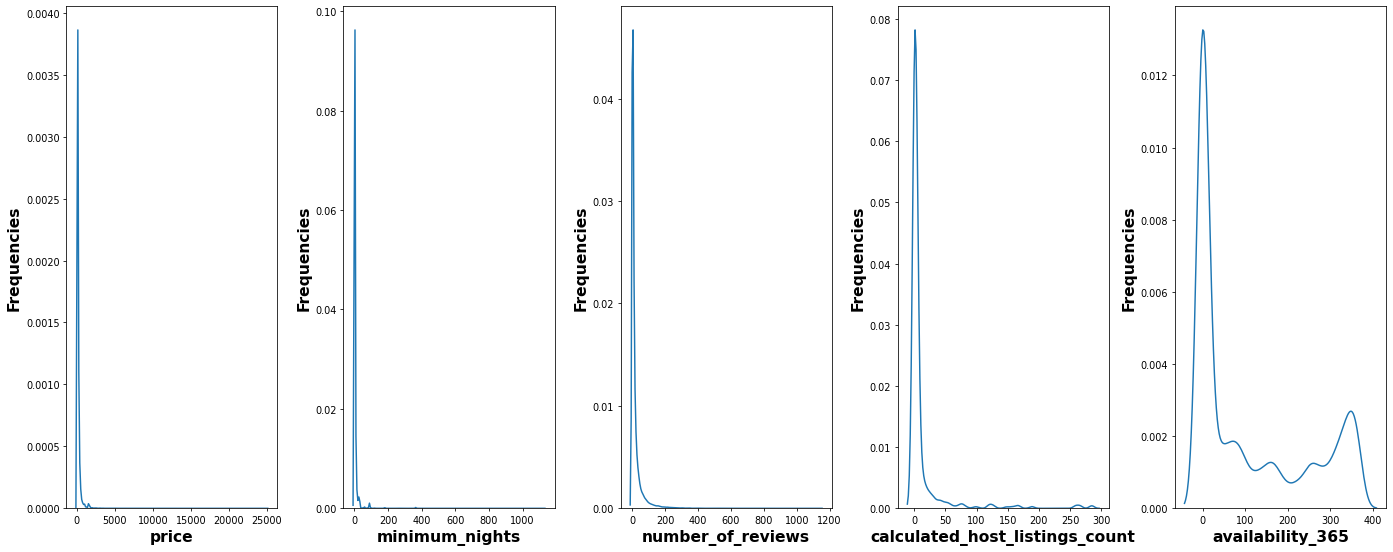

In [8]:
# Retrieve a column of numeric data
num = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']

# Create subplots
fig, axes = plt.subplots(1,5, figsize=(20, 8), dpi=70)

# Iterate over numerical data and axes
for ax, cols in zip(axes, num):
    sns.kdeplot(x=df1[cols], ax=ax)
    ax.set_xlabel(cols, fontdict={'color': 'black', 'weight': 'bold', 'size': 16})
    ax.set_ylabel('Frequencies', fontdict={'color': 'black', 'weight': 'bold', 'size': 16})
plt.tight_layout()
plt.show()

In [9]:
# Calculating skewness and kurtosis
for i in num:
    print('Skewness of {}: '.format(i), df1[i].skew())
    print('Kurtosis of {}: '.format(i), df1[i].kurt())
    print('--------------------------------------------------')

Skewness of price:  22.18510871884482
Kurtosis of price:  852.1710121616337
--------------------------------------------------
Skewness of minimum_nights:  22.498230621607927
Kurtosis of minimum_nights:  732.3591229388157
--------------------------------------------------
Skewness of number_of_reviews:  6.244044439473769
Kurtosis of number_of_reviews:  67.81616653424906
--------------------------------------------------
Skewness of calculated_host_listings_count:  5.181922351453291
Kurtosis of calculated_host_listings_count:  29.369874263547185
--------------------------------------------------
Skewness of availability_365:  0.8099440007110325
Kurtosis of availability_365:  -0.9646218827484878
--------------------------------------------------


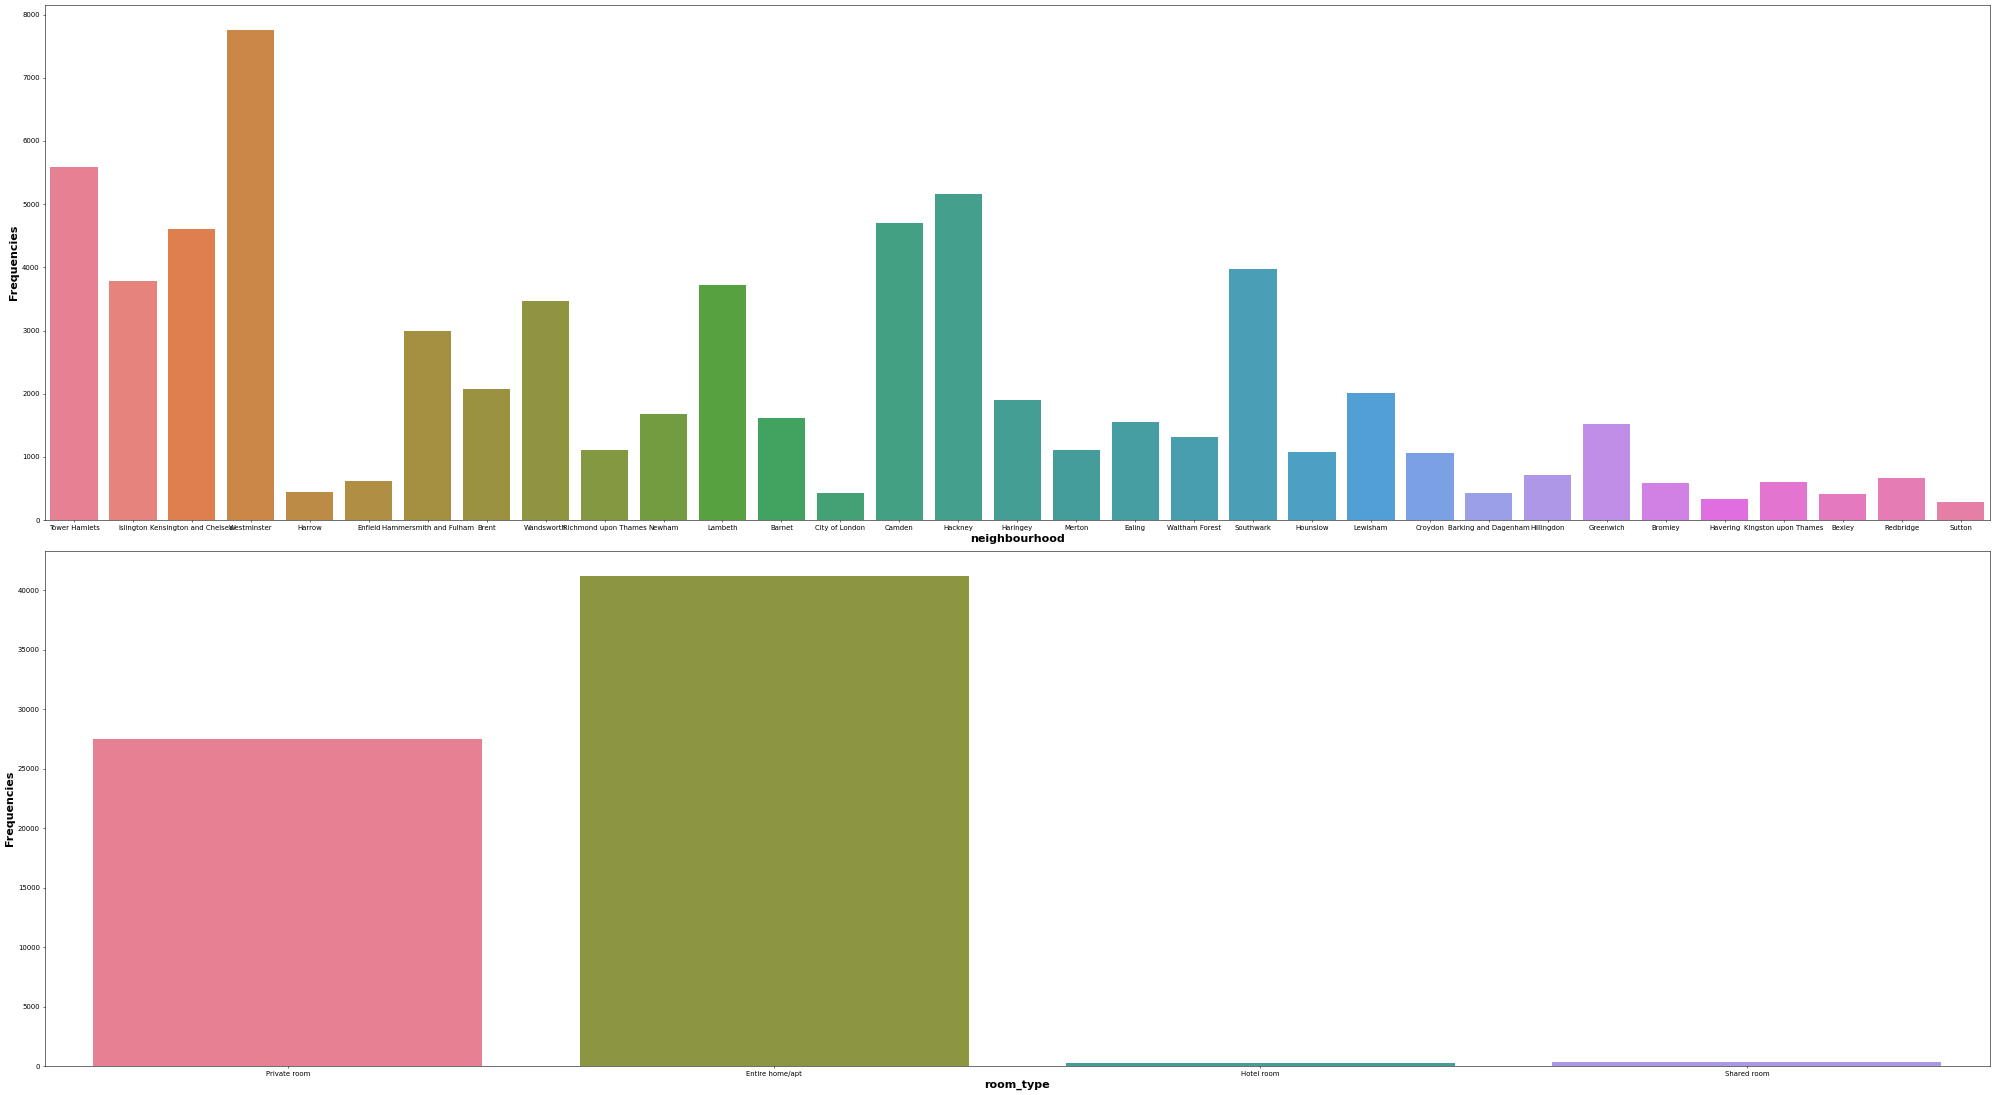

In [10]:
# Retrieve categorical data columns that have unique value < 6
categorical_columns = df1.select_dtypes(include=['object']).columns
filtered_columns = [col for col in categorical_columns if df1[col].nunique() < 35]

fig, axes = plt.subplots(2,1, figsize=(40,22), dpi=50)
    
# Iterate over categorical data and axes
for ax, col in zip(axes, filtered_columns):
    sns.countplot(x=df1[col], ax=ax, palette='husl')
    ax.set_xlabel(col, fontdict={'color': 'black', 'weight': 'bold', 'size': 16})
    ax.set_ylabel('Frequencies', fontdict={'color': 'black', 'weight': 'bold', 'size': 16})
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of places')

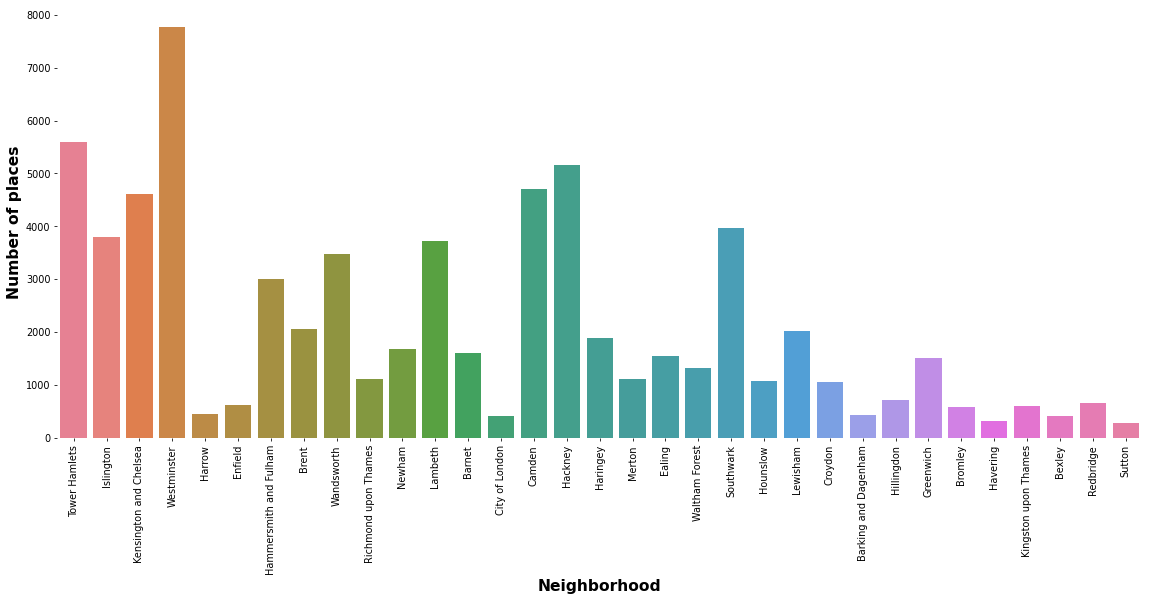

In [11]:
palette = 'husl'
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.countplot(x=df1['neighbourhood'], ax = ax, palette=palette)
ax.set_xlabel('Neighborhood', fontdict={'color':'black', 'weight':'bold', 'size': 16})
plt.xticks(rotation=90)
ax.set_ylabel('Number of places', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Proses ini bertujuan untuk memberikan visualisasi yang jelas tentang distribusi jumlah tempat di berbagai lingkungan, yang dapat digunakan untuk analisis lebih lanjut atau untuk membuat keputusan bisnis yang lebih baik.

Text(0, 0.5, 'Room type')

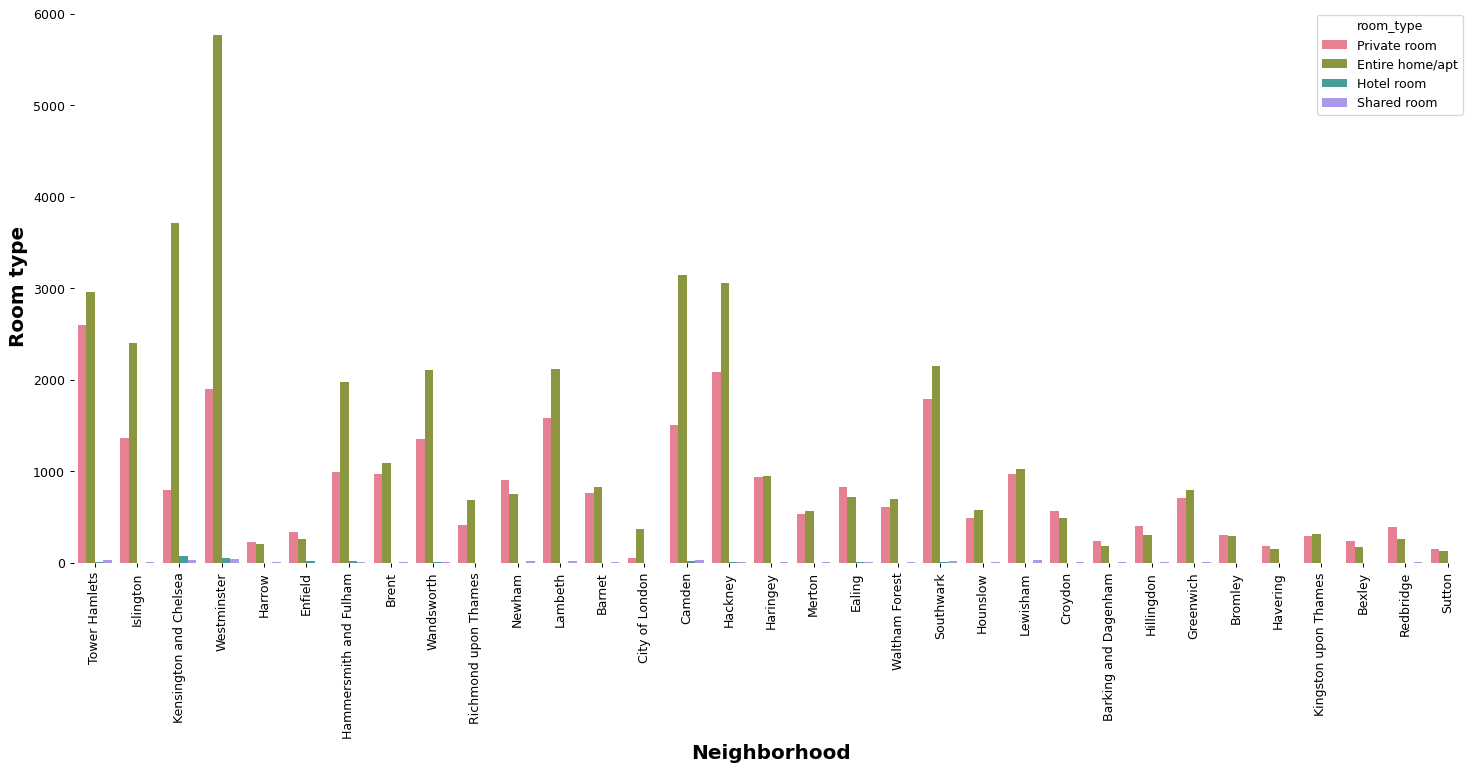

In [12]:
fig, ax = plt.subplots(figsize = (20,8), dpi = 90)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.countplot(x=df1['neighbourhood'], hue=df1['room_type'] ,ax = ax, palette=palette)
ax.set_xlabel('Neighborhood', fontdict={'color':'black', 'weight':'bold', 'size': 16})
plt.xticks(rotation=90)
ax.set_ylabel('Room type', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Proses ini bertujuan untuk memberikan visualisasi yang jelas tentang distribusi jumlah tempat di berbagai lingkungan, dibedakan berdasarkan jenis kamar. Ini dapat digunakan untuk analisis lebih lanjut atau untuk membuat keputusan bisnis yang lebih baik.

In [13]:
df1['expected_revenue_in_1000'] = df1.price * df1.availability_365 / 1000

Text(0, 0.5, 'Expected revenue (in thousands)')

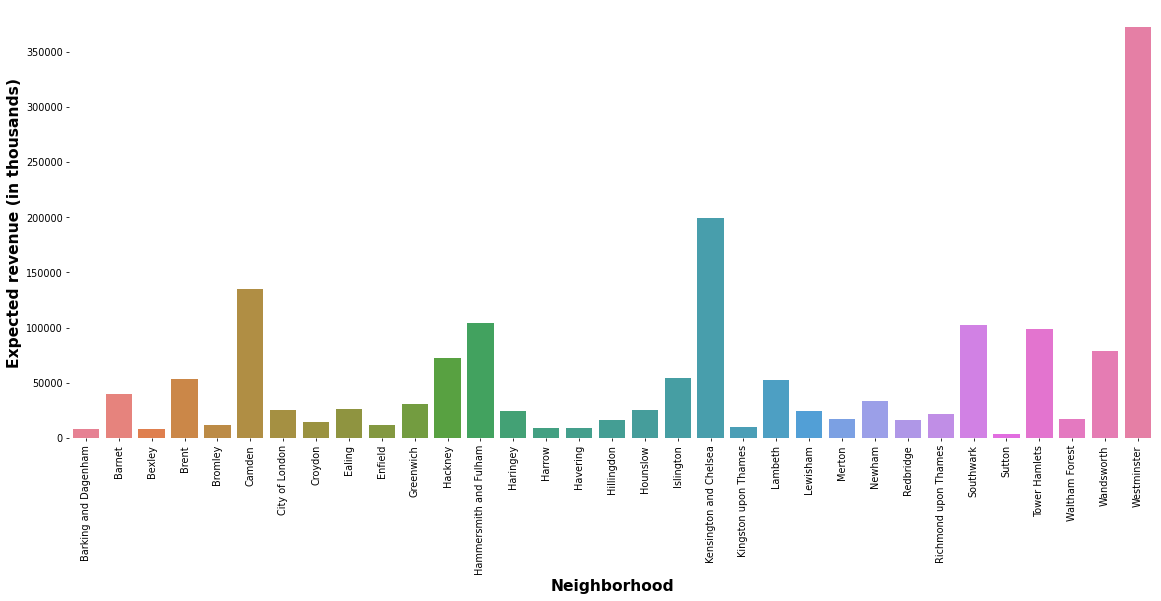

In [14]:
revenue_per_neighbourood = df1.groupby('neighbourhood').sum()
revenue_per_neighbourood = revenue_per_neighbourood.rename_axis('neighbourhood').reset_index()
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.barplot(y=revenue_per_neighbourood['expected_revenue_in_1000'], x=revenue_per_neighbourood['neighbourhood'], ax = ax, palette=palette)
ax.set_xlabel('Neighborhood', fontdict={'color':'black', 'weight':'bold', 'size': 16})
plt.xticks(rotation=90)
ax.set_ylabel('Expected revenue (in thousands)', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Proses ini bertujuan untuk memberikan gambaran tentang pendapatan yang diharapkan dari properti di berbagai lingkungan, yang dapat digunakan untuk analisis lebih lanjut atau untuk membuat keputusan bisnis yang lebih baik.

In [15]:
# Mengelompokkan berdasarkan 'host_id' dan menjumlahkan kolom numerik
hosts_reviews = df.groupby(['host_id']).sum(numeric_only=True).sort_values(by='number_of_reviews', ascending=False).iloc[:10]

# Mengatur ulang indeks
hosts_reviews = hosts_reviews.rename_axis('host_id').reset_index()

# Mengambil kolom 'host_id' dan 'host_name' tanpa duplikasi
id_name = df[['host_id', 'host_name']].drop_duplicates()

# Menggabungkan data berdasarkan 'host_id'
hosts_reviews = pd.merge(id_name, hosts_reviews, on='host_id').sort_values(by='number_of_reviews', ascending=False)
hosts_reviews.head()

,host_id,host_name,id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,expected_revenue_in_1000
6,82436841,Max And Billie,316113254,0.0,1081.711880,-4.092250,2596,21,7356,101.78,441,5136,1444,0.0,638.185
7,166617599,Ben,1475554736,0.0,2214.990610,-7.564240,5681,43,5708,146.89,1849,4172,2211,0.0,525.530
0,580475,Alessandro,548974692,0.0,2265.578150,-6.136960,4613,48,4983,46.97,1936,0,5,0.0,0.000
5,83740964,Ali,1319794917220005384,0.0,6542.061505,-23.128409,13283,2836,4735,83.19,16129,6741,483,0.0,703.242
2,19583485,Lisa,1371524984919237113,0.0,1184.556204,-3.322694,3418,69,3778,102.37,529,1595,1439,0.0,230.033


Text(0, 0.5, 'Total number of reviews')

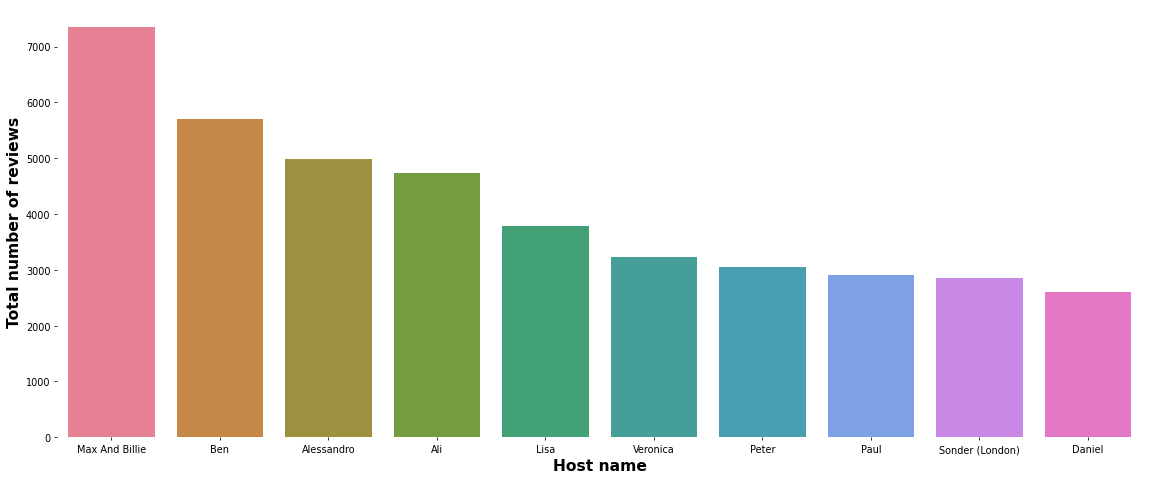

In [16]:
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.barplot(x=hosts_reviews['host_name'], y=hosts_reviews['number_of_reviews'], ax = ax, palette=palette)
ax.set_xlabel('Host name', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Total number of reviews', fontdict={'color':'black', 'weight':'bold', 'size': 16})

 untuk menganalisis dan memvisualisasikan data agar dapat memahami karakteristik dan performa ulasan dari berbagai host, serta untuk mengidentifikasi host yang paling banyak menerima ulasan.

In [17]:
popular_name_id = hosts_reviews['host_id']
popular_df = pd.merge(popular_name_id, df, on='host_id').drop_duplicates()
x = len(popular_df[popular_df['availability_365'] == 0]) # availability 0 days in a year
y = len(popular_df) # all facilities of top 10 hosts
no_available_percentage = x * 100/ y
print("%.2f" % no_available_percentage , '% of all facilities from top 10 most popular hosts are unavailable during the year')
print('\nThere are two possible explanation: \n1) The facility is being reconstructed \n2) The facility has been rented for the whole year')

49.07 % of all facilities from top 10 most popular hosts are unavailable during the year

There are two possible explanation: 
1) The facility is being reconstructed 
2) The facility has been rented for the whole year


Text(40, 470, 'Mean expected revenue - 34000 £ per year')

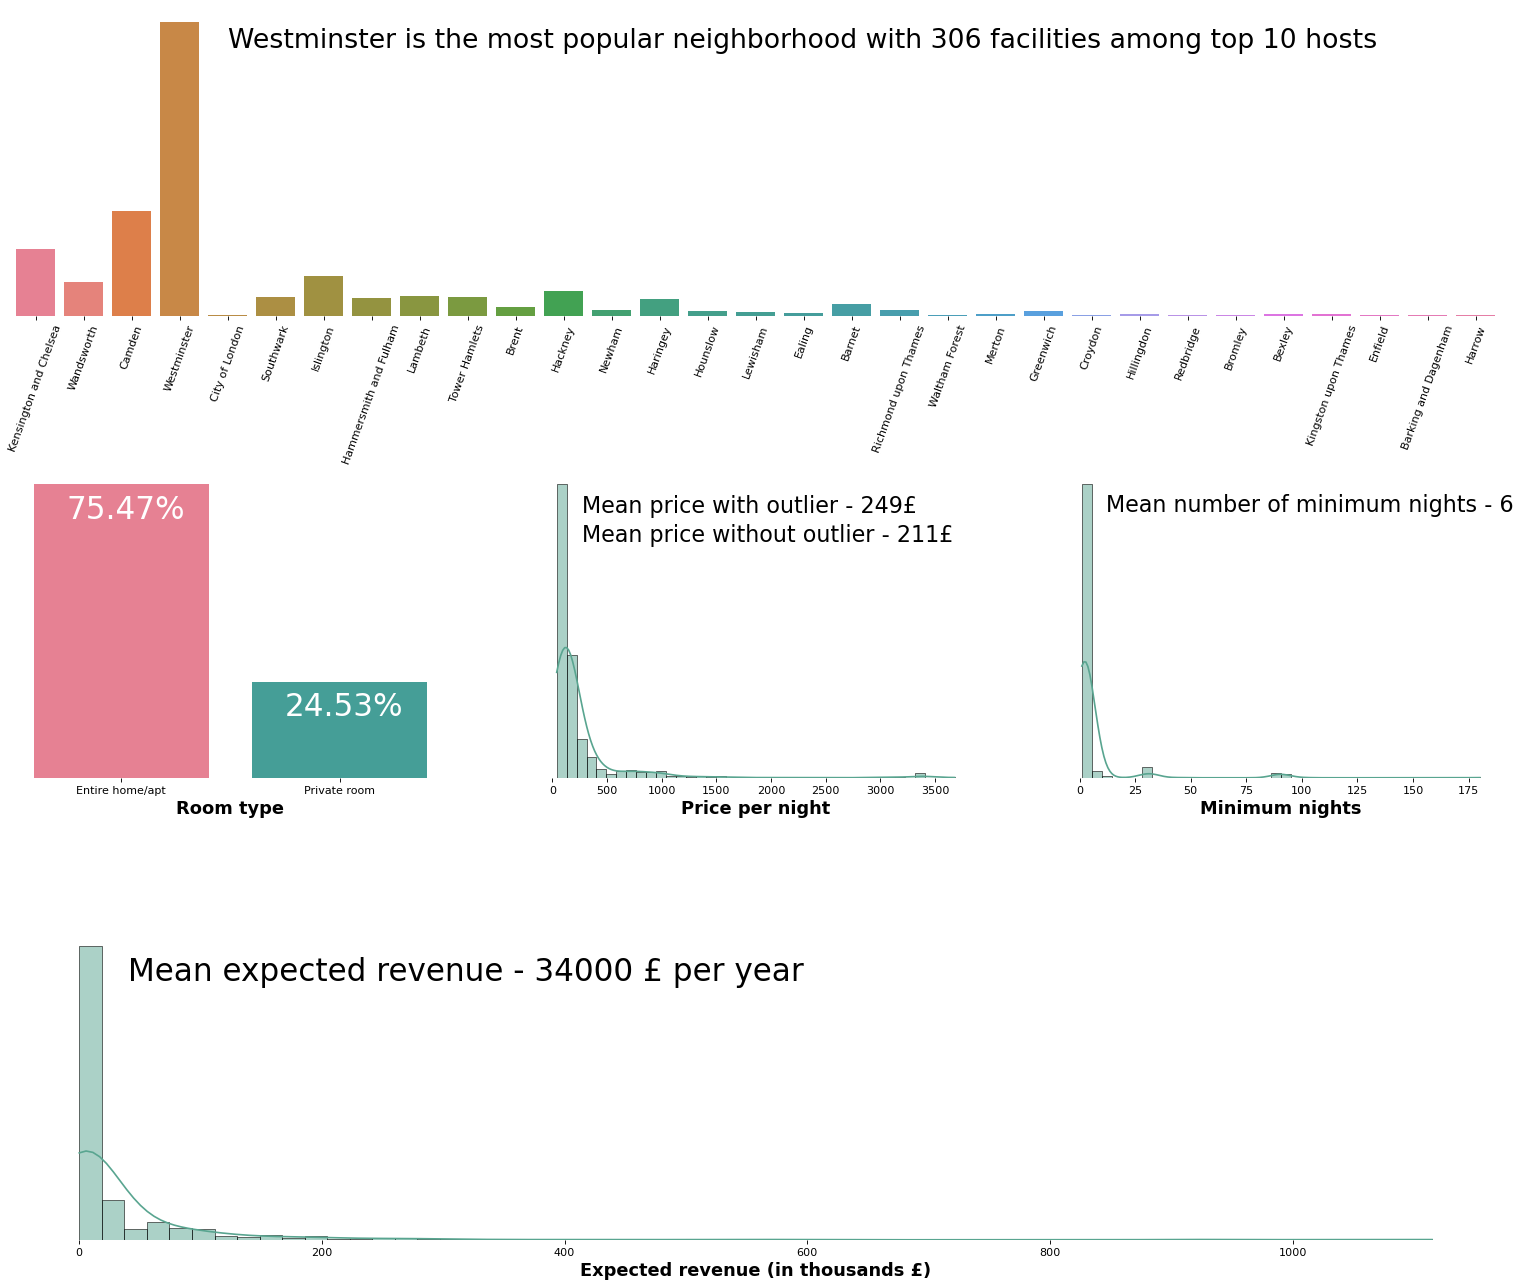

In [18]:
fig = plt.figure(figsize = (24,20),dpi = 80)
gs = fig.add_gridspec(3,3)
gs.update(wspace = 0.2, hspace = 0.5)

ax1 = fig.add_subplot(gs[0,0:])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,:])

axes = [ax1, ax3, ax4, ax5, ax6]

for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

sns.countplot(x = popular_df['neighbourhood'], ax=ax1, fill = True, linewidth=1, palette='husl')
ax1.axes.set_xticklabels(popular_df.neighbourhood.unique(),rotation=70, size=10)
ax1.text(4, 280, f'Westminster is the most popular neighborhood with {popular_df.neighbourhood.value_counts()["Westminster"]} facilities among top 10 hosts', fontdict={'color':'black', 'size': 24})

sns.countplot(x = popular_df['room_type'], ax=ax3, fill = True, linewidth=1, palette=palette)
ax3.set_xlabel('Room type', fontdict={'color':'black', 'weight':'bold', 'size': 16})
home_percentage = len(popular_df[popular_df['room_type'] == 'Entire home/apt']) * 100 /len(popular_df)
room_percentage = 100 - home_percentage
ax3.text(-0.25, 500 ,f'{"%.2f" % home_percentage}%', fontdict={'color':"white", 'size': 28})
ax3.text(0.75, 120 ,f'{"%.2f" % room_percentage}%', fontdict={'color':"white", 'size': 28})

sns.histplot(x = popular_df['price'], ax=ax4 ,bins=40, kde=True, linewidth=0.5, color=sns.color_palette("crest")[1])
ax4.set_xlabel('Price per night', fontdict={'color':'black', 'weight':'bold', 'size': 16})
home_percentage = len(popular_df[popular_df['room_type'] == 'Entire home/apt']) * 100 /len(popular_df)
room_percentage = 100 - home_percentage
ax4.text(270, 370,f'Mean price with outlier - {int(popular_df.price.mean())}£', fontdict={'color':"black", 'size': 20})
ax4.text(270, 330,f'Mean price without outlier - {int(popular_df[popular_df.price < 3000].price.mean())}£', fontdict={'color':"black", 'size': 20})


sns.histplot(x =popular_df['minimum_nights'], ax=ax5 ,bins=40, kde=True, linewidth=0.5, color=sns.color_palette("crest")[1])
ax5.set_xlabel('Minimum nights', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax5.text(12, 620,f'Mean number of minimum nights - {int(popular_df.minimum_nights.mean())}', fontdict={'color':"black", 'size': 20})

popular_df['expected_revenue'] = popular_df.price * popular_df.availability_365 / 1000
sns.histplot(x = popular_df['expected_revenue'], ax=ax6 ,bins=60, kde=True, linewidth=0.5, color=sns.color_palette("crest")[1])
ax6.set_xlabel('Expected revenue (in thousands £)', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax6.text(40, 470,f'Mean expected revenue - {int(popular_df.expected_revenue.mean())}000 £ per year', fontdict={'color':"black", 'size': 28})


Proses ini bertujuan untuk menganalisis ketersediaan dan karakteristik fasilitas dari host paling populer, serta memvisualisasikan data tersebut. Hasil akhirnya adalah pemahaman yang lebih baik tentang ketersediaan fasilitas dan karakteristik host paling populer, yang dapat digunakan untuk analisis lebih lanjut atau untuk membuat keputusan bisnis yang lebih baik.

In [19]:
df2 = df1.sort_values(by='calculated_host_listings_count')
host_facilities = pd.DataFrame({'host_id': df2.host_id, 'number_of_facilities':df2.calculated_host_listings_count}).sort_values(by='number_of_facilities', ascending=False).drop_duplicates()
busiest_hosts = host_facilities[:10]
busiest_hosts = pd.merge(busiest_hosts, df2, on='host_id')
columns = busiest_hosts.drop(columns=['host_id', 'host_name', 'number_of_facilities'])
busiest_names = busiest_hosts.drop(columns=columns)
busiest_names = busiest_names.drop_duplicates()

Text(0, 0.5, 'Total number of facilities')

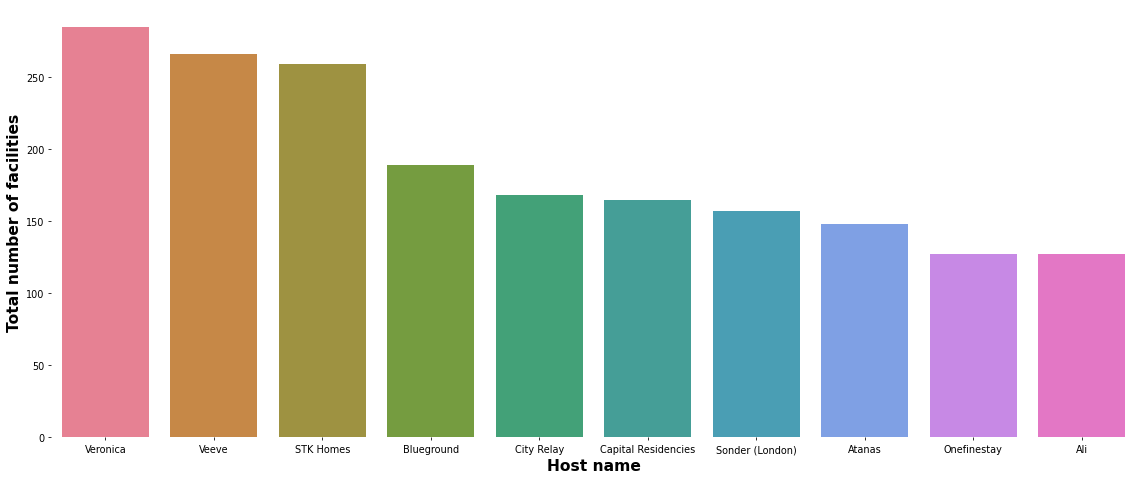

In [20]:
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.barplot(x=busiest_names['host_name'], y=busiest_names['number_of_facilities'], ax = ax, palette=palette)
ax.set_xlabel('Host name', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Total number of facilities', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Proses ini bertujuan untuk mengidentifikasi host dengan jumlah fasilitas terbanyak dan memvisualisasikan data tersebut. Hasil akhirnya adalah DataFrame busiest_names yang berisi informasi tentang host tersibuk, yang dapat digunakan untuk analisis lebih lanjut atau untuk membuat keputusan bisnis yang lebih baik.

In [21]:
from sklearn.preprocessing import LabelEncoder

# Nama kolom yang dibutuhkan untuk dilakukan label encoding
fl = ['room_type']  

# Membuat salinan data frame  
df_encode = df1[fl].copy()

# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in fl:  
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

In [22]:
revenues_by_hosts = df2.groupby('host_id').sum().sort_values(by='expected_revenue_in_1000', ascending=False)
revenues_by_hosts = revenues_by_hosts.rename_axis('host_id').reset_index()
columns1 = revenues_by_hosts.drop(columns=['host_id', 'expected_revenue_in_1000'])
cols_rev = revenues_by_hosts.drop(columns=columns1)
busiest_revenues = pd.merge(cols_rev, busiest_names, on='host_id').drop_duplicates()
busiest_revenues

,host_id,expected_revenue_in_1000,number_of_facilities,host_name
0,129230780,34946.746,259,STK Homes
1,258154594,22973.379,148,Atanas
2,224866971,20547.283,157,Sonder (London)
3,33889201,10511.264,266,Veeve
4,314162972,9923.458,189,Blueground
5,156158778,8862.151,127,Onefinestay
6,48165024,6786.783,165,Capital Residencies
7,1432477,4971.896,168,City Relay
8,28820321,2082.676,285,Veronica
9,83740964,703.242,127,Ali


Text(0, 0.5, 'Expected revenue (in thousands)')

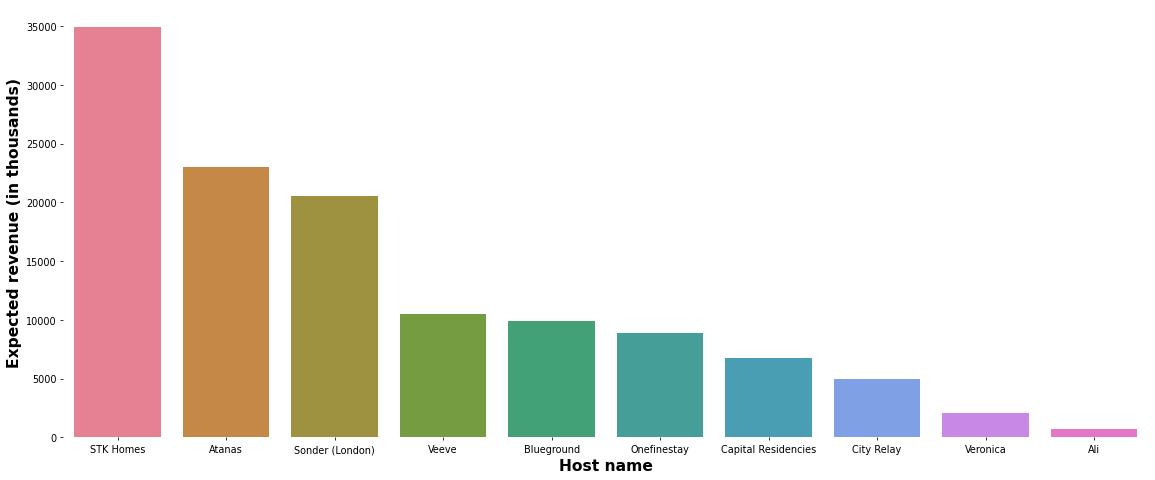

In [23]:
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.barplot(x=busiest_revenues['host_name'], y=busiest_revenues['expected_revenue_in_1000'], ax = ax, palette=palette)
ax.set_xlabel('Host name', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Expected revenue (in thousands)', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Proses ini bertujuan untuk mengidentifikasi host dengan pendapatan tertinggi dan memvisualisasikan pendapatan mereka. Hasil akhirnya adalah DataFrame busiest_revenues yang berisi informasi tentang host terkaya, yang dapat digunakan untuk analisis lebih lanjut atau untuk membuat keputusan bisnis yang lebih baik

In [24]:
df3 = df1.sort_values(by='expected_revenue_in_1000')
host_revenues = pd.DataFrame({'host_id': df3.host_id, 'revenue':df3.expected_revenue_in_1000}).sort_values(by='revenue', ascending=False)
host_revenues = host_revenues.groupby('host_id').sum()
host_revenues = host_revenues.rename_axis('host_id').reset_index()
richest_hosts = host_revenues.sort_values(by='revenue', ascending=False)[:10]
richest_hosts = pd.merge(richest_hosts, df3, on='host_id')
columns = richest_hosts.drop(columns=['host_id', 'host_name', 'revenue'])
richest_names = richest_hosts.drop(columns=columns)
richest_names = richest_names.drop_duplicates()
richest_names

,host_id,revenue,host_name
0,305877942,50493.370,Fenna BELVILLA
9,129230780,34946.746,STK Homes
268,63293666,26489.010,Atanas
389,258154594,22973.379,Atanas
537,224866971,20547.283,Sonder (London)
694,269308503,12910.023,Michael
773,36943329,12854.294,Teodora
833,146594021,11520.960,Caroline
862,336242959,10750.855,Tony
913,33889201,10511.264,Veeve


Text(0, 0.5, 'Expected revenue (in thousands)')

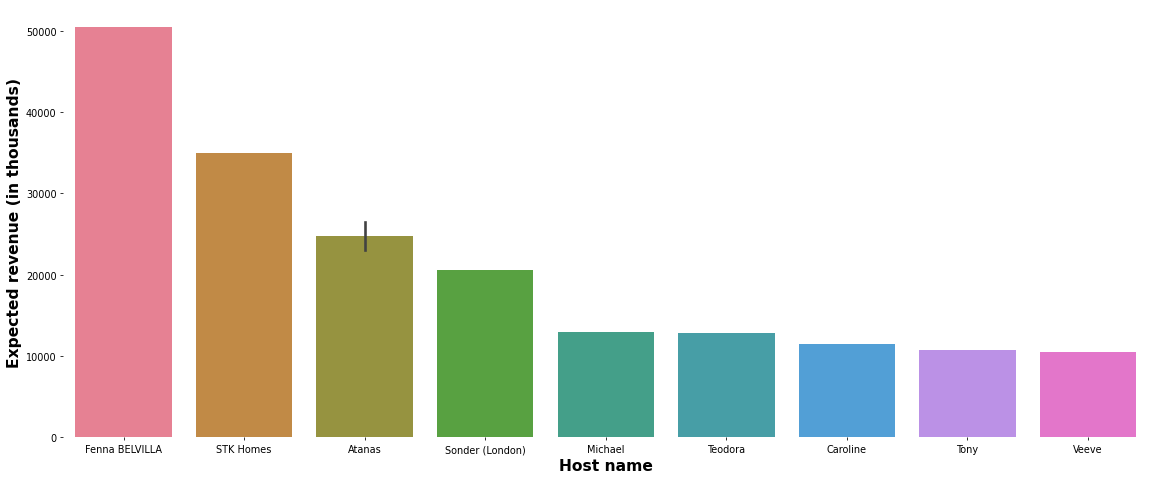

In [25]:
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.barplot(x=richest_names['host_name'], y=richest_names['revenue'], ax = ax, palette=palette)
ax.set_xlabel('Host name', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Expected revenue (in thousands)', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Proses ini bertujuan untuk mengidentifikasi host dengan pendapatan tertinggi dan menganalisis karakteristik mereka. Hasil akhirnya adalah DataFrame richest_names yang berisi informasi tentang host terkaya, yang dapat digunakan untuk analisis lebih lanjut atau untuk membuat keputusan bisnis yang lebih baik.

# Label Encoder

In [26]:
from sklearn.preprocessing import LabelEncoder

# Nama kolom yang dibutuhkan untuk dilakukan label encoding
fl = ['neighbourhood','room_type']  

# Membuat salinan data frame  
df_encode = df1[fl].copy()

# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in fl:  
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

In [27]:
for col in fl:
    print(df_encode[col].unique())
    print('-----'*12)
    print(df1[col].unique())

[29 18 19 32 14  9 12  3 31 26 24 21  1  6  5 11 13 23  8 30 27 17 22  7
  0 16 10  4 15 20  2 25 28]
------------------------------------------------------------
['Tower Hamlets' 'Islington' 'Kensington and Chelsea' 'Westminster'
 'Harrow' 'Enfield' 'Hammersmith and Fulham' 'Brent' 'Wandsworth'
 'Richmond upon Thames' 'Newham' 'Lambeth' 'Barnet' 'City of London'
 'Camden' 'Hackney' 'Haringey' 'Merton' 'Ealing' 'Waltham Forest'
 'Southwark' 'Hounslow' 'Lewisham' 'Croydon' 'Barking and Dagenham'
 'Hillingdon' 'Greenwich' 'Bromley' 'Havering' 'Kingston upon Thames'
 'Bexley' 'Redbridge' 'Sutton']
[2 0 1 3]
------------------------------------------------------------
['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']


# Feature Selection

In [28]:
feat_select = ['price', 'longitude', 'latitude', 'availability_365']

In [29]:
# Menggabungkan data frame
df_model = df_encode.merge(df1[feat_select], left_index = True, right_index = True, how = 'left')  
df_model.head()

,neighbourhood,room_type,price,longitude,latitude,availability_365
0,29,2,55,-0.05396,51.52874,74
1,18,2,50,-0.11270,51.56861,343
2,29,0,90,-0.07426,51.52851,222
3,18,2,180,-0.10484,51.52478,236
4,19,0,297,-0.20004,51.51464,180


In [30]:
data_model = df_model.sample(frac=0.5, random_state=500).reset_index(drop=True)

In [31]:
print(data_model.shape)
print(df_model.shape)

(34676, 6)
(69351, 6)


# Feature Scaling

In [32]:
# sandardscaler untuk df['price']

from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
scaled_data = scaled.fit_transform(data_model[feat_select])

In [33]:
scaled_data = pd.DataFrame(scaled_data, columns=feat_select)

In [34]:
# Menggabungkan data frame
n_r = data_model[['neighbourhood', 'room_type']]

dfm = n_r.merge(scaled_data, left_index = True, right_index = True, how = 'left')  
dfm.head()

,neighbourhood,room_type,price,longitude,latitude,availability_365
0,11,0,-0.127425,0.651728,0.548978,1.097899
1,29,2,-0.306492,1.140384,0.126836,-0.707934
2,21,2,-0.238737,0.260347,-0.838879,1.339684
3,5,0,0.058902,-0.102079,0.379946,-0.813715
4,19,0,-0.250836,-0.668000,-0.415541,-0.813715


# Build model using KMeans

In [35]:
import numpy as np
from sklearn.datasets import make_blobs

In [36]:
import numpy as np

# Konversi data_model ke array NumPy untuk perhitungan numerik
data_model_array = dfm[['neighbourhood','price']].values

# Inisialisasi centroid secara acak
def initialize_centroids(data, k):
    np.random.seed(500)
    random_indices = np.random.permutation(data.shape[0])
    centroids = data[random_indices[:k]]
    return centroids

# Penugasan klaster berdasarkan jarak ke centroid
def assign_clusters(data, centroids):
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

# Update centroid berdasarkan mean dari klaster
def update_centroids(data, labels, k):
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Fungsi utama KMeans
def kmeans(data, k, max_iters=10, tol=1e-6):
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        # Periksa jika perubahan centroid sudah berada di bawah tolerance
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return centroids, labels

# Menentukan jumlah klaster dan menerapkan KMeans
k = 6
centroids, labels = kmeans(data_model_array, k)

# Menambahkan hasil klaster ke data_model asli
dfm['cluster'] = labels
dfm.head()

,neighbourhood,room_type,price,longitude,latitude,availability_365,cluster
0,11,0,-0.127425,0.651728,0.548978,1.097899,3
1,29,2,-0.306492,1.140384,0.126836,-0.707934,2
2,21,2,-0.238737,0.260347,-0.838879,1.339684,1
3,5,0,0.058902,-0.102079,0.379946,-0.813715,0
4,19,0,-0.250836,-0.668000,-0.415541,-0.813715,4


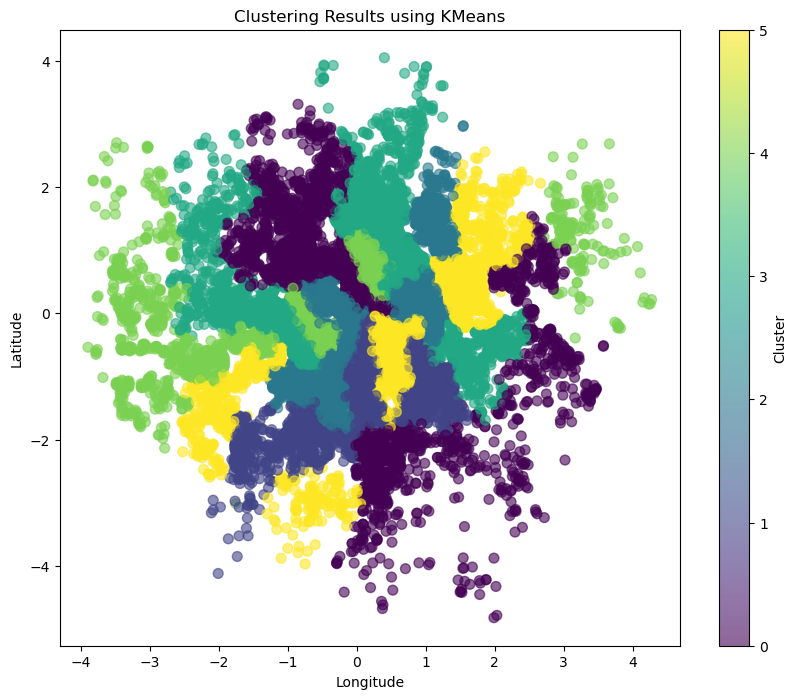

In [37]:
# Visualisasi hasil klastering dengan scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(dfm['longitude'], dfm['latitude'], c=dfm['cluster'], cmap='viridis', marker='o', s=50, alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering Results using KMeans')
plt.show()

## Model Evaluation KMeans

In [38]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Menghitung metrik evaluasi
silhouette_avg = silhouette_score(dfm, labels)
davies_bouldin = davies_bouldin_score(dfm, labels)
calinski_harabasz = calinski_harabasz_score(dfm, labels)

print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

Silhouette Score: 0.5041
Davies-Bouldin Index: 0.7731
Calinski-Harabasz Index: 100814.5389


In [39]:
dfm['cluster'].value_counts()

cluster
2    9080
3    7069
0    5676
4    5268
5    3877
1    3706
Name: count, dtype: int64

In [40]:
group = dfm.groupby('cluster')
group.mean()

,neighbourhood,room_type,price,longitude,latitude,availability_365
cluster,,,,,,
0,3.918605,0.842671,-0.009880,-0.082973,0.275932,0.164259
1,21.478683,0.924717,-0.116500,0.091624,-1.214205,-0.128069
2,30.737996,0.739317,0.074684,0.103536,-0.021317,-0.004002
3,11.030132,0.883859,-0.090161,0.030783,0.511249,-0.076176
4,18.100987,0.638762,0.077414,-0.533400,0.144938,0.043702
5,26.054166,0.977302,0.010119,0.460054,-0.322503,-0.029174


# Build model using DBSCAN

In [41]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np

# Memilih kolom untuk analisis (longitude dan latitude sebagai fitur)
X = dfm[['price', 'neighbourhood']].values

# Inisialisasi DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=10)

# Melakukan clustering
labels = dbscan.fit_predict(X)

# Menambahkan hasil clustering ke dataframe
dfm['Cluster'] = labels

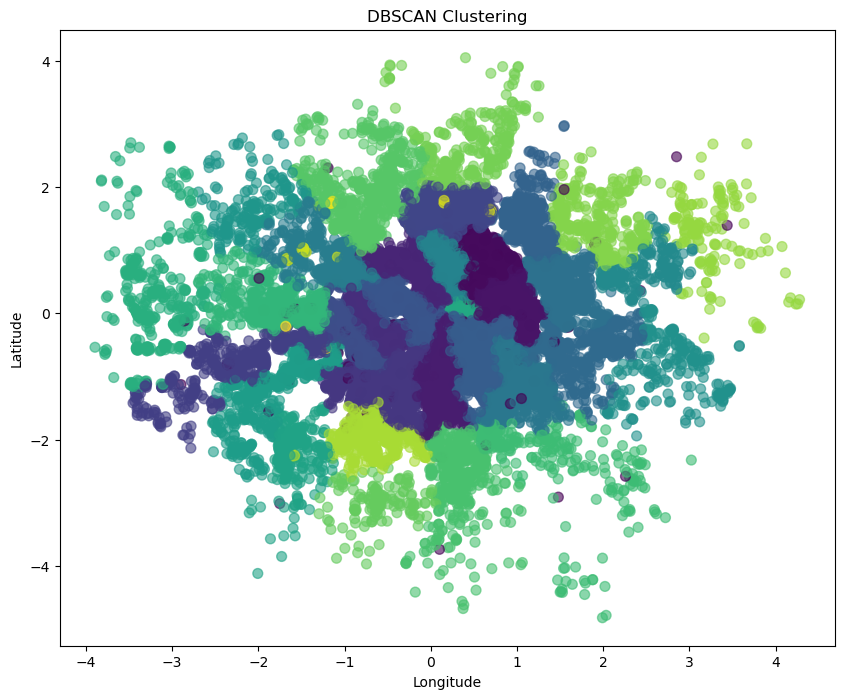

In [42]:
# visualisasi hasil clustering DBSCANm dengan scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(dfm['longitude'], dfm['latitude'], c=dfm['Cluster'], cmap='viridis', marker='o', s=50, alpha=0.6)
plt.colorbar(scatter, label='cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering')
plt.show()

## Merge data sesudah dan sebelum clustering

In [51]:
d2 = dfm['Cluster']
dfb = data_model.merge(d2, left_index = True, right_index = True, how = 'left')  
dfb.head()

,neighbourhood,room_type,price,longitude,latitude,availability_365,Cluster
0,11,0,126,-0.062503,51.536571,253,0
1,29,2,52,-0.012940,51.515790,14,1
2,21,2,80,-0.102200,51.468250,285,2
3,5,0,203,-0.138960,51.528250,0,3
4,19,0,75,-0.196360,51.489090,0,4


In [44]:
data_model.shape

(34676, 6)

In [45]:
dfb.shape

(34676, 7)

In [46]:
dfm.shape

(34676, 8)

[2 0 1 3]
------------------------------------------------------------
['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']

In [53]:
group = dfb.groupby('Cluster')
data_mean = group.mean()
data_mean

,neighbourhood,room_type,price,longitude,latitude,availability_365
Cluster,,,,,,
-1,18.359477,0.470588,3910.908497,-0.143051,51.494502,158.666667
0,11.000000,0.823941,112.113875,-0.067827,51.546205,70.696075
1,29.000000,0.968964,117.789607,-0.045079,51.518278,88.586792
2,21.000000,0.869732,122.103448,-0.119158,51.463611,80.866995
3,5.000000,0.686856,172.646907,-0.146582,51.536961,111.809708
4,19.000000,0.367589,284.140975,-0.189705,51.499223,122.587176
5,31.000000,0.807365,149.183003,-0.177661,51.457003,90.269688
6,17.000000,1.001825,101.071168,-0.342145,51.473111,145.697080
7,13.000000,0.983498,95.484048,-0.105228,51.586720,85.661166


## Model evaluation

In [55]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

silhouette_avg = silhouette_score(dfb, labels)
print(f'Silhouette Score: {silhouette_avg}')

db_index = davies_bouldin_score(dfb, labels)
print(f'Davies-Bouldin Index: {db_index}')

ch_index = calinski_harabasz_score(dfb, labels)
print(f'Calinski-Harabasz Index: {ch_index}')

Silhouette Score: -0.21132017387179203
Davies-Bouldin Index: 17.740183666073786
Calinski-Harabasz Index: 600.6551720013658


# Data Cleaning

In [58]:
dfb.isnull().sum()

neighbourhood       0
room_type           0
price               0
longitude           0
latitude            0
availability_365    0
Cluster             0
dtype: int64

# Check out How Many Outliers in Dataset

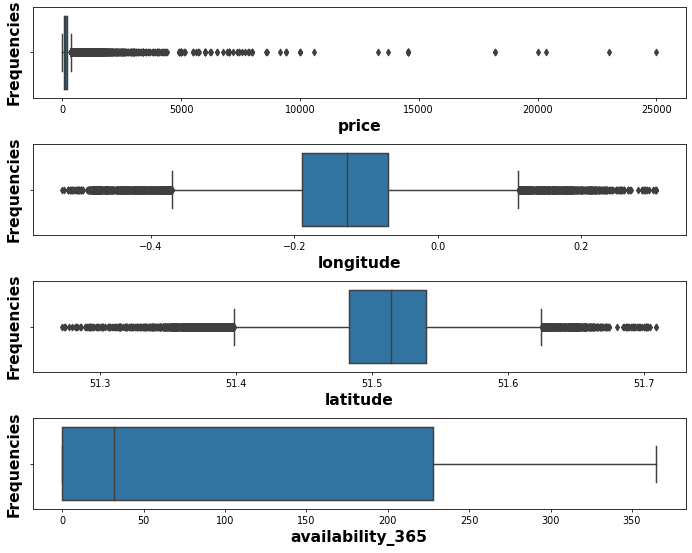

In [59]:
# Retrieve a column of numeric data
numeric = dfb[feat_select]

# Create subplots
fig, axes = plt.subplots(4,1, figsize=(10, 8), dpi=70)

# Iterate over numerical data and axes
for ax, cols in zip(axes, numeric):
    sns.boxplot(x=df1[cols], ax=ax)
    ax.set_xlabel(cols, fontdict={'color': 'black', 'weight': 'bold', 'size': 16})
    ax.set_ylabel('Frequencies', fontdict={'color': 'black', 'weight': 'bold', 'size': 16})
plt.tight_layout()
plt.show()

# Marketing Channel Analysis

## Melakukan transformasi data yang sudah di cluster dengan DBSCAN

[29 18 19 32 14  9 12  3 31 26 24 21  1  6  5 11 13 23  8 30 27 17 22  7
  0 16 10  4 15 20  2 25 28]
------------------------------------------------------------
['Tower Hamlets' 'Islington' 'Kensington and Chelsea' 'Westminster'
 'Harrow' 'Enfield' 'Hammersmith and Fulham' 'Brent' 'Wandsworth'
 'Richmond upon Thames' 'Newham' 'Lambeth' 'Barnet' 'City of London'
 'Camden' 'Hackney' 'Haringey' 'Merton' 'Ealing' 'Waltham Forest'
 'Southwark' 'Hounslow' 'Lewisham' 'Croydon' 'Barking and Dagenham'
 'Hillingdon' 'Greenwich' 'Bromley' 'Havering' 'Kingston upon Thames'
 'Bexley' 'Redbridge' 'Sutton']
 
[2 0 1 3]
------------------------------------------------------------
['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']

In [60]:
import pandas as pd

# Mapping dictionary untuk neighbourhood
neighbourhood_mapping = {
    29: 'Tower Hamlets', 18: 'Islington', 19: 'Kensington and Chelsea', 32: 'Westminster',
    14: 'Harrow', 9: 'Enfield', 12: 'Hammersmith and Fulham', 3: 'Brent', 31: 'Wandsworth',
    26: 'Richmond upon Thames', 24: 'Newham', 21: 'Lambeth', 1: 'Barnet', 6: 'City of London',
    5: 'Camden', 11: 'Hackney', 13: 'Haringey', 23: 'Merton', 8: 'Ealing', 30: 'Waltham Forest',
    27: 'Southwark', 17: 'Hounslow', 22: 'Lewisham', 7: 'Croydon', 0: 'Barking and Dagenham',
    16: 'Hillingdon', 10: 'Greenwich', 4: 'Bromley', 15: 'Havering', 20: 'Kingston upon Thames',
    2: 'Bexley', 25: 'Redbridge', 28: 'Sutton'
}

# Mapping dictionary untuk room_type
room_type_mapping = {
    2: 'Hotel room', 0: 'Private room', 1: 'Entire home/apt', 3: 'Shared room'
}

# Mengembalikan encoding ke bentuk asli
dfb['neighbourhood'] = dfb['neighbourhood'].map(neighbourhood_mapping)
dfb['room_type'] = dfb['room_type'].map(room_type_mapping)

dfb.head()

,neighbourhood,room_type,price,longitude,latitude,availability_365,Cluster
0,Hackney,Private room,126,-0.062503,51.536571,253,0
1,Tower Hamlets,Hotel room,52,-0.012940,51.515790,14,1
2,Lambeth,Hotel room,80,-0.102200,51.468250,285,2
3,Camden,Private room,203,-0.138960,51.528250,0,3
4,Kensington and Chelsea,Private room,75,-0.196360,51.489090,0,4


## Conversion Rate per Price Segment

In [62]:
# Menghitung conversion rate per price segment
conversion_rate = dfm.groupby('cluster').apply(lambda x: (365 - x['availability_365'].sum()) / (365 * len(x))).reset_index()
conversion_rate.columns = ['price_cluster', 'conversion_rate']
#conversion_rate = conversion_rate.sort_values(by='conversion_rate', ascending=False)

conversion_rate.head()

,price_cluster,conversion_rate
0,0,-0.000274
1,1,0.000621
2,2,0.000121
3,3,0.000350
4,4,0.000070


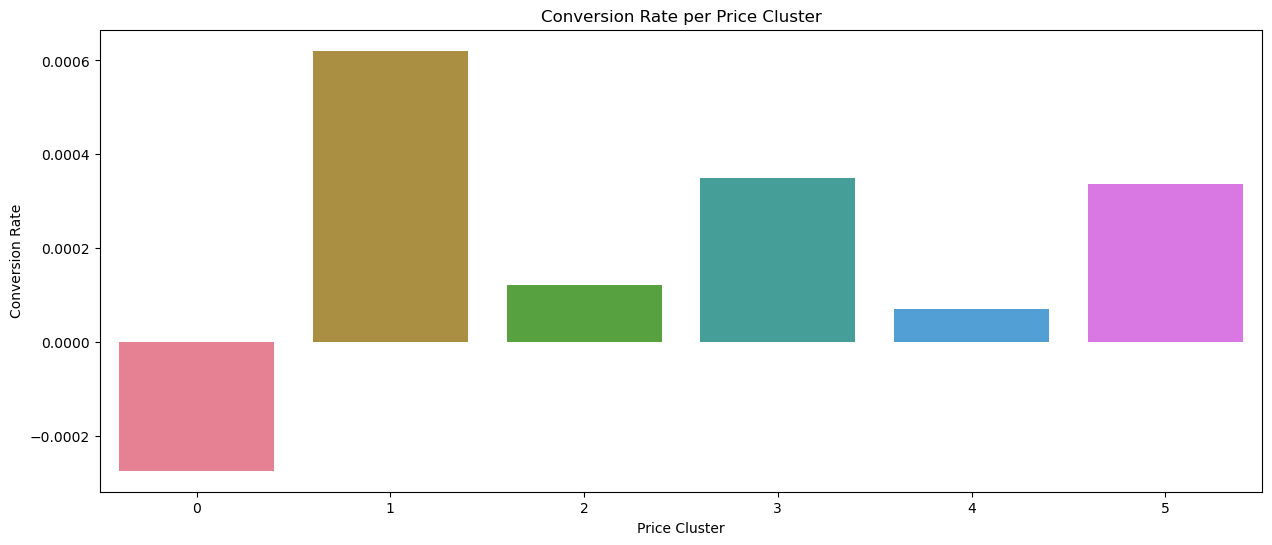

In [64]:
# Membuat plot hasil perhitungan conversion_rate
plt.figure(figsize=(15, 6))
sns.barplot(x='price_cluster', y='conversion_rate', data=conversion_rate, palette='husl')
plt.xlabel('Price Cluster')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate per Price Cluster')
plt.show()

## Occupancy Rate per Price Segment

In [65]:
# Menghitung occupancy rate per price segment
occupancy_rate = dfm.groupby('cluster').apply(lambda x: (365 - x['availability_365'].sum()) / (365 * len(x))).reset_index()
occupancy_rate.columns = ['price_cluster', 'occupancy_rate']
occupancy_rate = occupancy_rate.sort_values(by='occupancy_rate', ascending=False)

occupancy_rate.head()

,price_cluster,occupancy_rate
1,1,0.000621
3,3,0.000350
5,5,0.000338
2,2,0.000121
4,4,0.000070


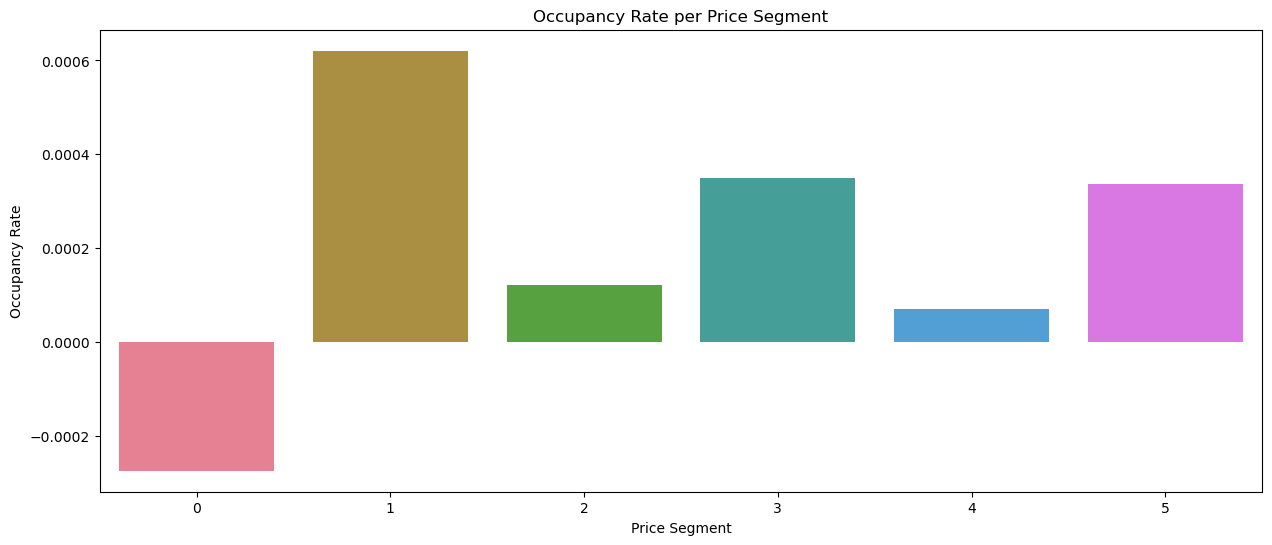

In [66]:
# Membuat plot
plt.figure(figsize=(15, 6))
sns.barplot(x='price_cluster', y='occupancy_rate', data=occupancy_rate, palette='husl')
plt.xlabel('Price Segment')
plt.ylabel('Occupancy Rate')
plt.title('Occupancy Rate per Price Segment')
plt.show()

In [68]:
df_final = dfb.merge(conversion_rate['conversion_rate'], left_index = True, right_index = True, how = 'left')
df_final = df_final.merge(occupancy_rate['occupancy_rate'], left_index=True, right_index=True, how='left')
df_final.head()

,neighbourhood,room_type,price,longitude,latitude,availability_365,Cluster,conversion_rate,occupancy_rate
0,Hackney,Private room,126,-0.062503,51.536571,253,0,-0.000274,-0.000274
1,Tower Hamlets,Hotel room,52,-0.012940,51.515790,14,1,0.000621,0.000621
2,Lambeth,Hotel room,80,-0.102200,51.468250,285,2,0.000121,0.000121
3,Camden,Private room,203,-0.138960,51.528250,0,3,0.000350,0.000350
4,Kensington and Chelsea,Private room,75,-0.196360,51.489090,0,4,0.000070,0.000070


## Funnel Chart

In [72]:
dff = dfb[['neighbourhood', 'room_type']]
dfo = dfm.drop(columns=['neighbourhood', 'room_type', 'cluster'])
df_lihat = dff.merge(dfo, left_index = True, right_index = True, how = 'left')
df_lihat.head()

,neighbourhood,room_type,price,longitude,latitude,availability_365,Cluster
0,Hackney,Private room,-0.127425,0.651728,0.548978,1.097899,0
1,Tower Hamlets,Hotel room,-0.306492,1.140384,0.126836,-0.707934,1
2,Lambeth,Hotel room,-0.238737,0.260347,-0.838879,1.339684,2
3,Camden,Private room,0.058902,-0.102079,0.379946,-0.813715,3
4,Kensington and Chelsea,Private room,-0.250836,-0.668000,-0.415541,-0.813715,4


In [73]:
df_lihat.shape

(34676, 7)

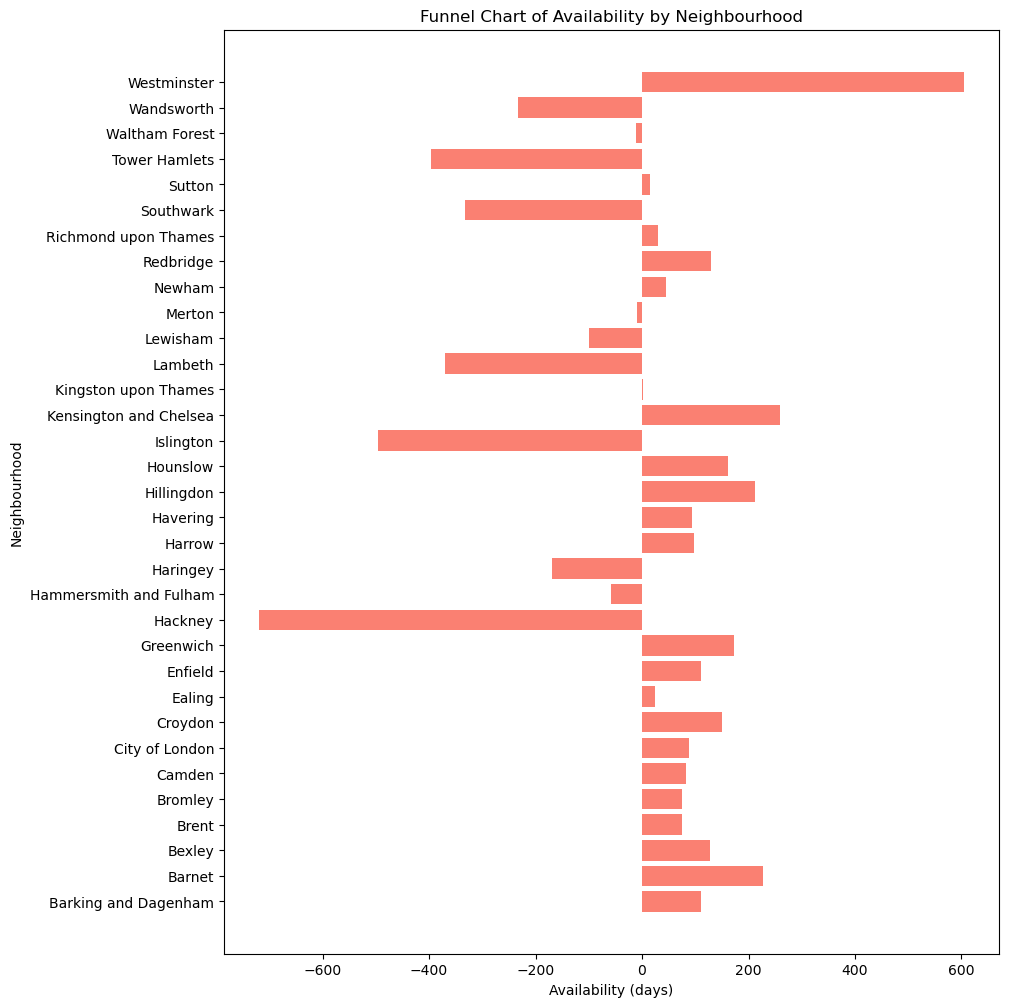

In [74]:
# Mengelompokkan data berdasarkan neighbourhood
grouped_data = df_lihat.groupby('neighbourhood').agg({
    'price': 'mean',
    'availability_365': 'sum'
}).reset_index()

# Membuat funnel chart
fig, ax = plt.subplots(figsize=(10, 12))
ax.barh(grouped_data['neighbourhood'], grouped_data['availability_365'], color='salmon')
ax.set_xlabel('Availability (days)')
ax.set_ylabel('Neighbourhood')
ax.set_title('Funnel Chart of Availability by Neighbourhood')
plt.show()